# RIVM aantal besmettingen Gemeente Moerdijk



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_json("https://data.rivm.nl/covid-19/COVID-19_aantallen_gemeente_per_dag.json")
df

,Date_of_report,Date_of_publication,Municipality_code,Municipality_name,Province,Security_region_code,Security_region_name,Municipal_health_service,ROAZ_region,Total_reported,Hospital_admission,Deceased
0,2021-05-08 10:00:00,2020-02-27,GM0014,Groningen,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0,0
1,2021-05-08 10:00:00,2020-02-27,GM0034,Almere,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,0,0,0
2,2021-05-08 10:00:00,2020-02-27,GM0037,Stadskanaal,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0,0
3,2021-05-08 10:00:00,2020-02-27,GM0047,Veendam,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0,0
4,2021-05-08 10:00:00,2020-02-27,GM0050,Zeewolde,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
165181,2021-05-08 10:00:00,2021-05-08,None,None,Limburg,VR23,Limburg-Noord,GGD Limburg-Noord,Netwerk Acute Zorg Limburg,3,0,0
165182,2021-05-08 10:00:00,2021-05-08,None,None,Limburg,VR24,Limburg-Zuid,GGD Zuid-Limburg,Netwerk Acute Zorg Limburg,6,0,0
165183,2021-05-08 10:00:00,2021-05-08,None,None,Zuid-Holland,VR15,Haaglanden,GGD Haaglanden,Netwerk Acute Zorg West,10,0,0
165184,2021-05-08 10:00:00,2021-05-08,None,None,Fryslân,VR02,Fryslân,GGD Fryslân,Acute Zorgnetwerk Noord Nederland,0,0,0


In [2]:
df.head()

,Date_of_report,Date_of_publication,Municipality_code,Municipality_name,Province,Security_region_code,Security_region_name,Municipal_health_service,ROAZ_region,Total_reported,Hospital_admission,Deceased
0,2021-05-08 10:00:00,2020-02-27,GM0014,Groningen,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0,0
1,2021-05-08 10:00:00,2020-02-27,GM0034,Almere,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,0,0,0
2,2021-05-08 10:00:00,2020-02-27,GM0037,Stadskanaal,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0,0
3,2021-05-08 10:00:00,2020-02-27,GM0047,Veendam,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0,0
4,2021-05-08 10:00:00,2020-02-27,GM0050,Zeewolde,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165186 entries, 0 to 165185
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Date_of_report            165186 non-null  object
 1   Date_of_publication       165186 non-null  object
 2   Municipality_code         154261 non-null  object
 3   Municipality_name         154261 non-null  object
 4   Province                  165186 non-null  object
 5   Security_region_code      164749 non-null  object
 6   Security_region_name      164749 non-null  object
 7   Municipal_health_service  165186 non-null  object
 8   ROAZ_region               162564 non-null  object
 9   Total_reported            165186 non-null  int64 
 10  Hospital_admission        165186 non-null  int64 
 11  Deceased                  165186 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 15.1+ MB


In [4]:
df.describe()

,Total_reported,Hospital_admission,Deceased
count,165186.000000,165186.000000,165186.000000
mean,9.404362,0.177103,0.104845
std,22.433080,0.759526,0.492454
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000
75%,11.000000,0.000000,0.000000
max,677.000000,49.000000,24.000000


In [5]:
df = df[df["Municipality_name"] == "Moerdijk"]

In [6]:
df.groupby(["Municipality_name"]).sum()

,Total_reported,Hospital_admission,Deceased
Municipality_name,,,
Moerdijk,3179,44,39


<AxesSubplot:xlabel='Date_of_publication'>

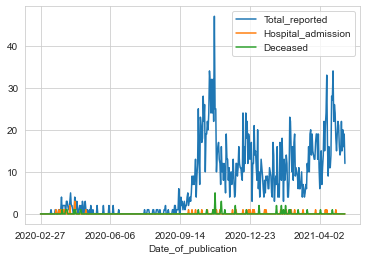

In [7]:
df.groupby(["Date_of_publication"]).sum().plot()

In [17]:
df = df.groupby(["Date_of_publication"]).sum()
df.tail(30)

,Total_reported,Hospital_admission,Deceased,Cumulative_Total_reported,Cumulative_Hospital_admission,Cumulative_Deceased
Date_of_publication,,,,,,
2021-04-09,15,0,0,2618,41,38
2021-04-10,21,1,0,2639,42,38
2021-04-11,24,0,0,2663,42,38
2021-04-12,33,1,0,2696,43,38
2021-04-13,17,0,0,2713,43,38
2021-04-14,9,0,0,2722,43,38
2021-04-15,16,0,0,2738,43,38
2021-04-16,11,0,0,2749,43,38
2021-04-17,11,0,0,2760,43,38


In [9]:
df = df.assign(Cumulative_Total_reported = df['Total_reported'].cumsum(axis = 0))

In [10]:
df = df.assign(Cumulative_Hospital_admission = df['Hospital_admission'].cumsum(axis = 0))

In [11]:
df = df.assign(Cumulative_Deceased = df['Deceased'].cumsum(axis = 0))

In [12]:
df = df[df.index >= "2020-07-01"]
#df.head

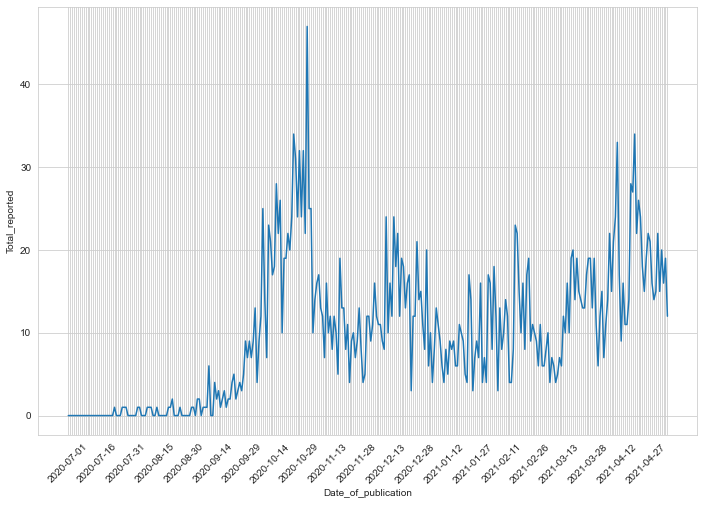

In [13]:
def lesslabels():
    for ind, label in enumerate(fig.get_xticklabels()):
        if ind % 15 == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)


def cm2inch(value):
    return value/2.54

plt.figure(figsize=(cm2inch(30), cm2inch(20)))
fig = sns.lineplot(data=df["Total_reported"])
# plt.axhline(y=1.0, color='r', linestyle='-')
lesslabels()
plt.xticks(rotation=45)
plt.show()

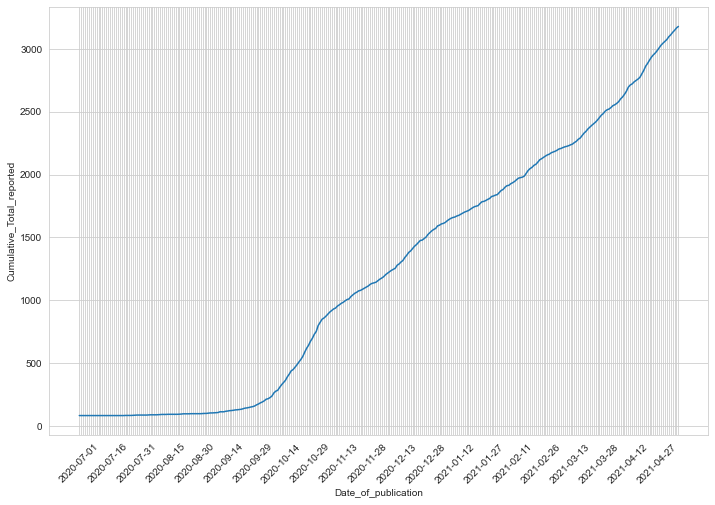

In [14]:
plt.figure(figsize=(cm2inch(30), cm2inch(20)))
fig = sns.lineplot(data=df["Cumulative_Total_reported"])

lesslabels()
plt.xticks(rotation=45)
plt.show()

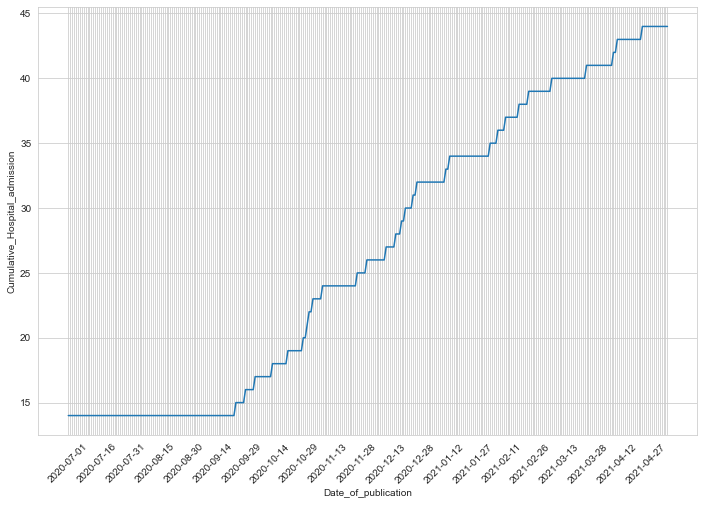

In [15]:
plt.figure(figsize=(cm2inch(30), cm2inch(20)))
fig = sns.lineplot(data=df["Cumulative_Hospital_admission"])
# plt.axhline(y=1.0, color='r', linestyle='-')
lesslabels()
plt.xticks(rotation=45)
plt.show()

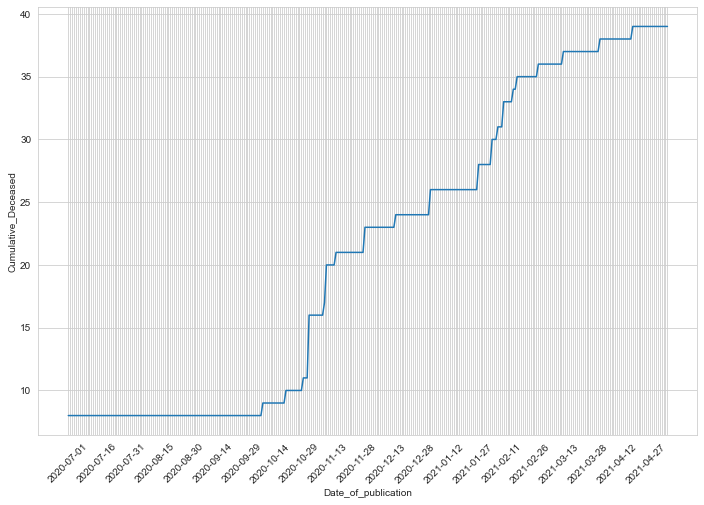

In [16]:
plt.figure(figsize=(cm2inch(30), cm2inch(20)))
fig = sns.lineplot(data=df["Cumulative_Deceased"])
# plt.axhline(y=1.0, color='r', linestyle='-')
lesslabels()
plt.xticks(rotation=45)
plt.show()